In [71]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [72]:
df = pd.read_csv('Galton.txt', sep='\t')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   parent  952 non-null    float64
 1   child   952 non-null    float64
dtypes: float64(2)
memory usage: 15.0 KB


In [74]:
df.head()

,parent,child
0,73.60,72.22
1,72.69,67.72
2,72.85,70.46
3,71.68,65.13
4,70.62,61.20


In [75]:
inch2cm = 2.54
df['parent'] = df['parent'] * inch2cm
df['child'] = df['child'] * inch2cm

In [76]:
x_min, x_max = df['parent'].min(), df['parent'].max()
y_min, y_max = df['child'].min(), df['child'].max()
x_min, x_max, y_min, y_max

(160.07080000000002, 187.70600000000002, 155.448, 189.7126)

In [77]:
def f(x, a, b):
    if type(x) is not list: 
        return a*x + b
    return np.array([i*a + b for i in x])

In [99]:
def scatterplot(df, x_column='parent', y_column='child', tuples=[]):
    fig = px.scatter(df, x=x_column, y=y_column)
    x_min, x_max = df[x_column].min(), df[x_column].max()
    fig.update_xaxes(
        range=[x_min-5, x_max+5],  # sets the range of xaxis
        constrain='domain',  # meanwhile compresses the xaxis by decreasing its "domain"
    )
    y_min, y_max = df[y_column].min(), df[y_column].max()
    fig.update_yaxes(
        range=[y_min-5, y_max+5],
        scaleanchor = "x",
        scaleratio = 1.0,
    )
    fig.update_layout(
        xaxis_title="fars højde i cm",
        yaxis_title="søns højde i cm",
    )
    for a, b in tuples:
        sign = '+'
        if b < 0:
            sign = '-'
            b = -b
        fig.add_trace(go.Scatter(x=df[x_column].values, y=f(df[x_column].values, a, b), mode="lines", name='%.2fx %s %.2f' % (a, sign, b)))
    fig.show()    
    return

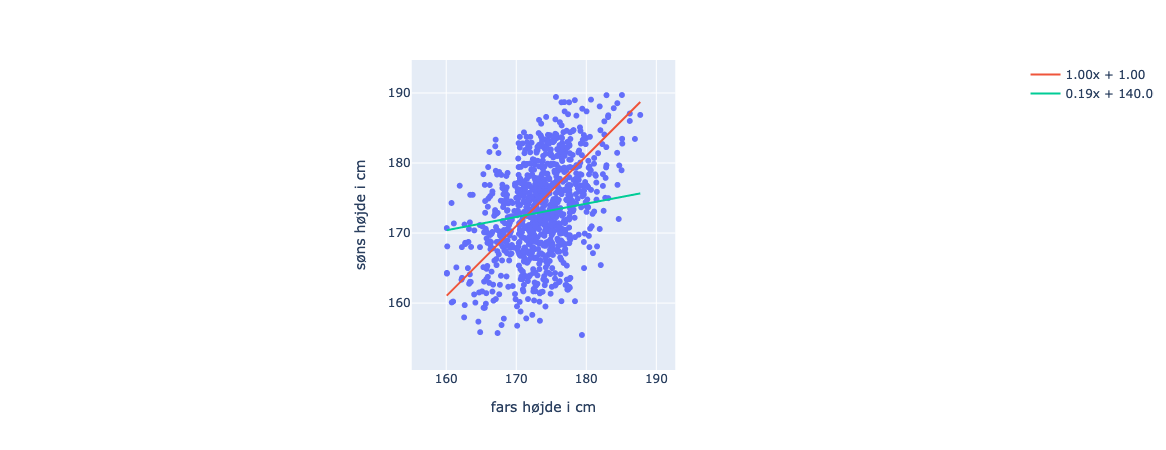

In [100]:
fig = scatterplot(df, tuples=[(1, 1), (0.19, 140)])

In [9]:
first10 = df.head(10)

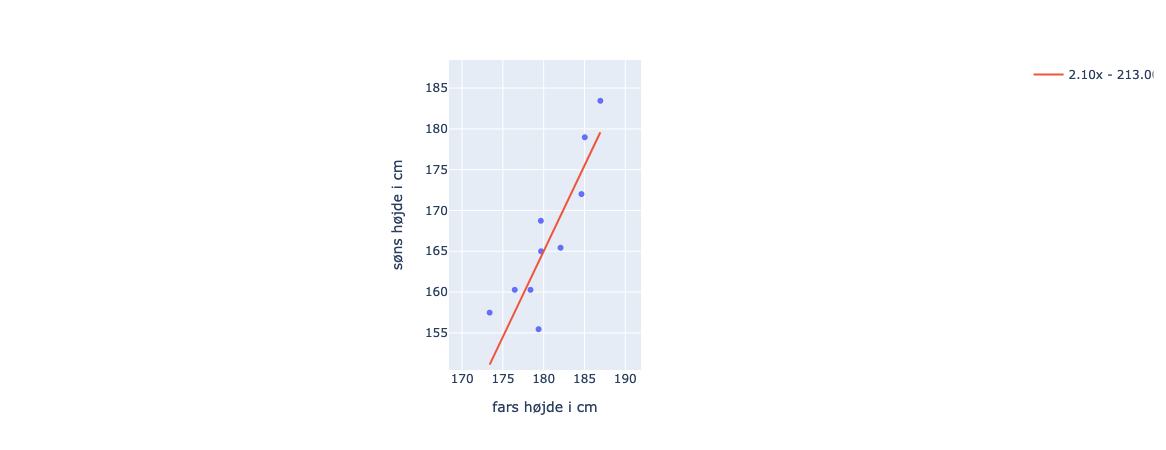

In [10]:
fig = scatterplot(first10, tuples=[(2.1, -213)])

In [11]:
first10 = df.head(10)

In [12]:
(first10['child'] - (2.1*first10['parent'] - 212.5)).pow(2).sum()

184.3695455188005

In [13]:
def leastSquares(df, x_column='parent', y_column='child'):
    x_mean = df[x_column].mean()
    y_mean = df[y_column].mean()
    a_tilde = ((df[x_column] - x_mean) * (df[y_column] - y_mean)).sum() / ((df[x_column] - x_mean).pow(2).sum())
    b_tilde = y_mean - a_tilde * x_mean
    return a_tilde, b_tilde

In [14]:
a_tilde, b_tilde = leastSquares(first10)
a_tilde, b_tilde

(1.932238057835482, -182.18151731607136)

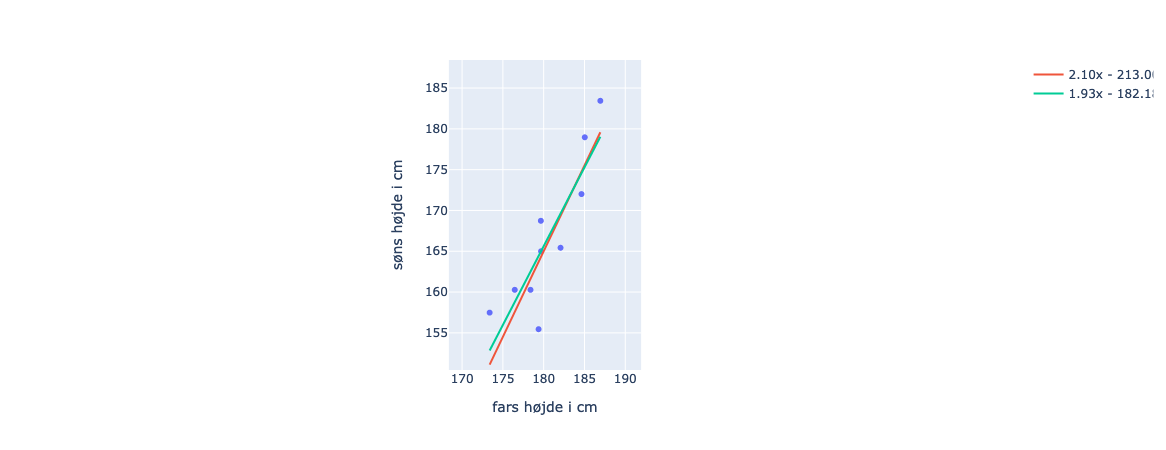

In [15]:
scatterplot(first10, tuples=[(2.1, -213), (a_tilde, b_tilde)])

In [16]:
a_tilde, b_tilde = leastSquares(df)
a_tilde, b_tilde

(0.6115222089779633, 67.19712037928039)

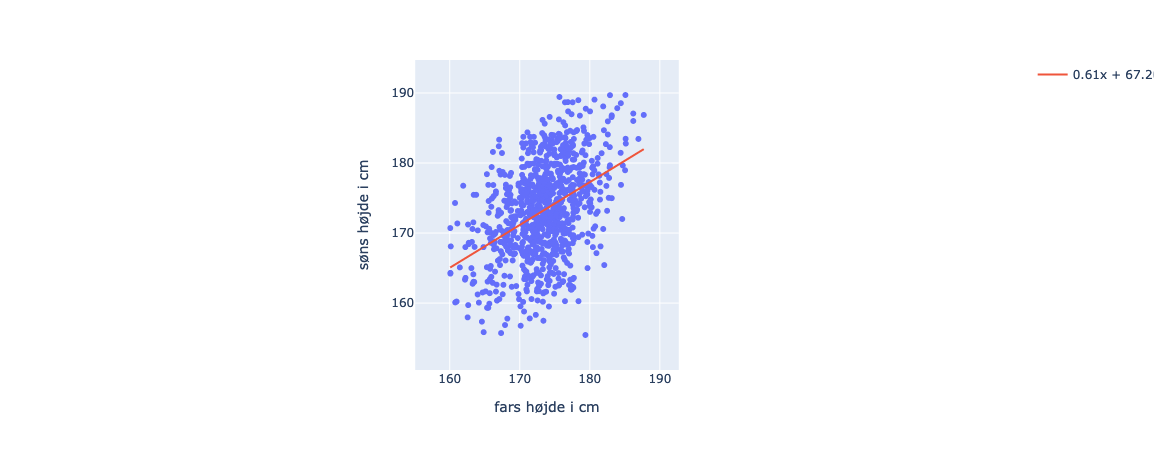

In [17]:
scatterplot(df, tuples=[(a_tilde, b_tilde)])

In [18]:
def l(x):
    return 0.6115222089779633*x + 67.19712037928039

In [19]:
l(183)

179.10568462224768

In [20]:
l(168)

169.9328514875782

In [21]:
l(188)

182.1632956671375

In [22]:
my_array = np.array([[1, 3, 4, 6, 8, 10, 11, 12, 14, 16], [2.2, 5.3,  8.3, 11.9, 14.4, 21.0, 21.7, 24.2, 29.1, 30.9]])

In [23]:
df1 = pd.DataFrame(my_array).T

In [24]:
a_tilde, b_tilde = leastSquares(df1, 0, 1)
a_tilde, b_tilde 

(2.0058956916099775, -0.15011337868481078)

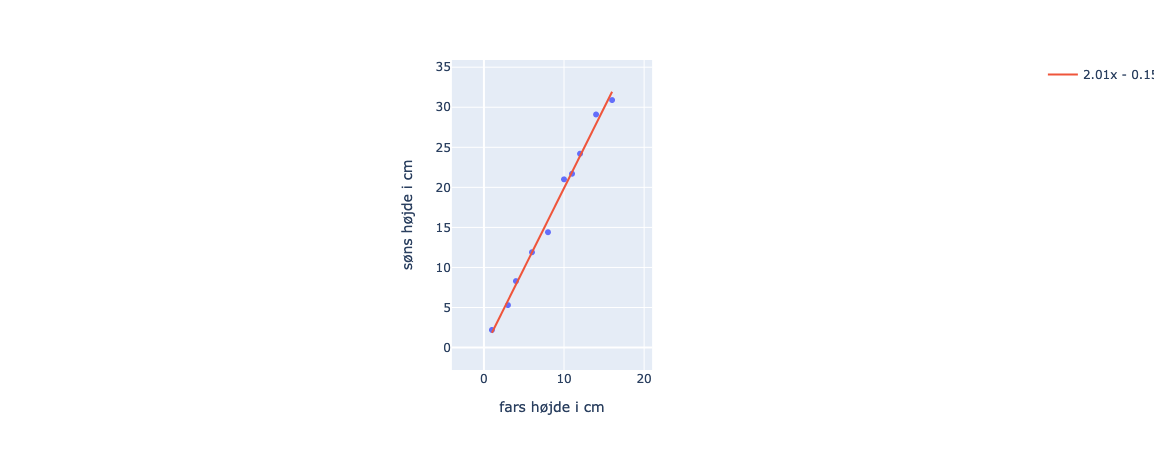

In [25]:
scatterplot(df1, 0, 1, tuples=[(a_tilde, b_tilde)])

In [26]:
def residualspredningen(df, x_column='parent', y_column='child'):
    a_tilde, b_tilde = leastSquares(df, x_column, y_column)
    return np.sqrt( 1.0/(len(df[y_column])-2) * (df[y_column] - a_tilde * df[x_column] - b_tilde).pow(2).sum())

In [27]:
residualspredningen(df1, 0, 1)

0.9105174079134233

In [28]:
my_array = np.array([[1, 3, 4, 6, 8, 10, 11, 12, 14, 16], [5.5, 9.5,  9.0, 16.1, 12.3, 13.1, 21.8, 20.9, 26.9, 31.4]])

In [29]:
df2 = pd.DataFrame(my_array).T

In [30]:
a_tilde, b_tilde = leastSquares(df2, 0, 1)
a_tilde, b_tilde 

(1.5888888888888888, 3.144444444444444)

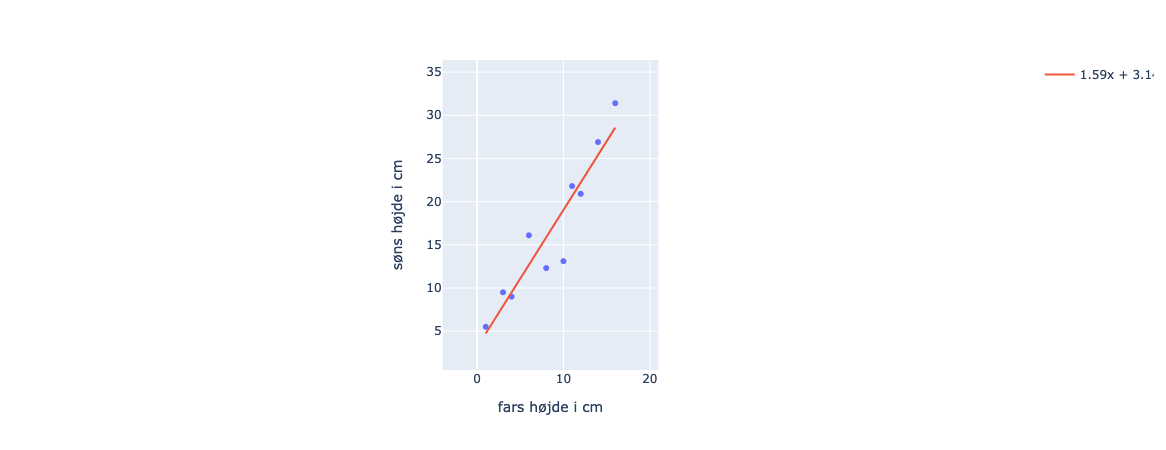

In [31]:
scatterplot(df2, 0, 1, tuples=[(a_tilde, b_tilde)])

In [32]:
residualspredningen(df2, 0, 1)

3.0890487568541585

In [33]:
residualspredningen(df)

5.986556670553717

In [34]:
df['afstand'] = df['child'] - 0.6115222089779633 * df['parent'] - 67.19712037928039

In [35]:
df.head()

,parent,child,afstand
0,186.9440,183.4388,1.921272
1,184.6326,172.0088,-8.095256
2,185.0390,178.9684,-1.384178
3,182.0672,165.4302,-13.105057
4,179.3748,155.4480,-21.440794


In [36]:
len(df[np.abs(df["afstand"]) > 12])

41

In [37]:
def korrelationen(df, x_column='parent', y_column='child'):
    x_mean = df[x_column].mean()
    y_mean = df[y_column].mean()
    t = ((df[y_column] - y_mean) * (df[x_column] - x_mean)).sum()
    n = np.sqrt( ((df[y_column] - y_mean)**2).sum() * ((df[x_column] - x_mean)**2).sum())
    return t/n

In [38]:
df3 = pd.DataFrame(np.array([[1, 3, 4, 6, 8, 10, 11, 12, 14, 16], [3, 7, 9, 13, 17, 21, 23, 25, 29, 33]])).T

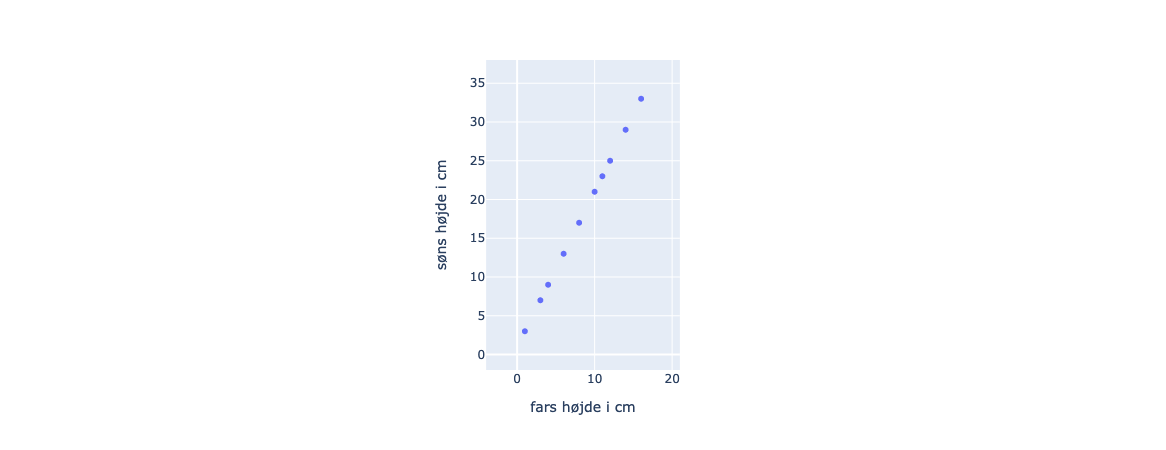

In [39]:
scatterplot(df3, 0, 1)

In [40]:
korrelationen(df3, 0, 1)

1.0

In [41]:
df4 = pd.DataFrame(np.array([[3, 5, 6, 8, 9, 10, 12, 14, 18, 21], [15.2, 14.1, 11.4, 8., 6.3, 4.9, 2.1, -1.3, -7., -11.4]])).T

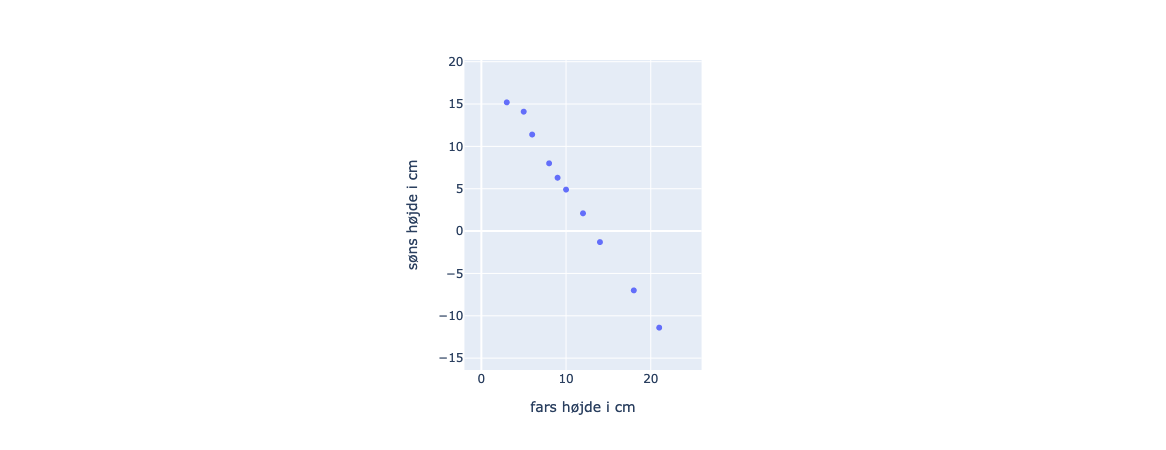

In [42]:
scatterplot(df4, 0, 1)

In [43]:
korrelationen(df4, 0, 1)

-0.9981340715959257

In [44]:
df5 = pd.DataFrame(np.array([[1, 4, 7, 8, 9, 11, 14, 16, 19, 22], [4.3, 3.5, 0.8, -11.2, 3.1, -0.3, -13.2, 12.8, -6.7, -22.1]])).T

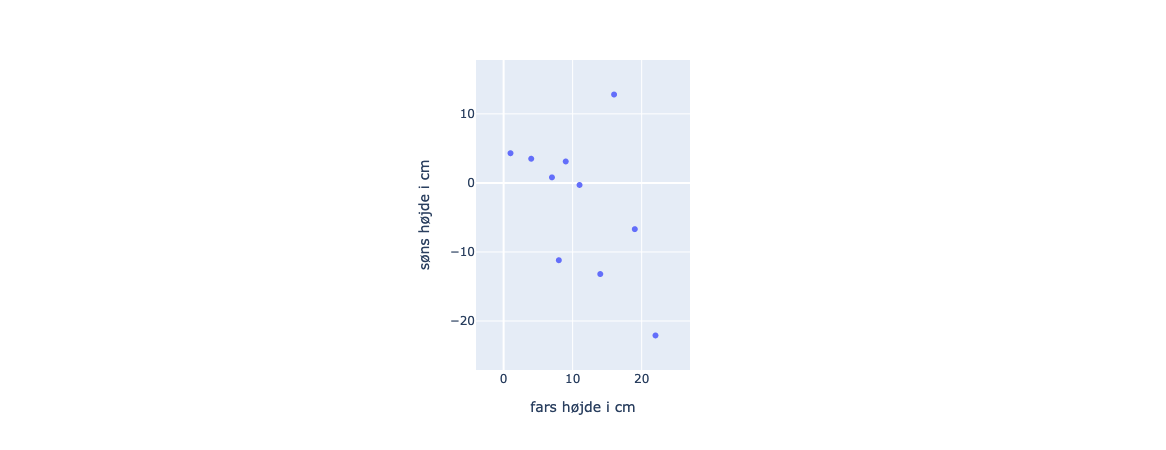

In [45]:
scatterplot(df5, 0, 1)

In [46]:
korrelationen(df5, 0, 1)

-0.5082280990192481

In [47]:
sigma = korrelationen(df)
sigma

0.4209471445938739

In [48]:
def forklaringsgraden(df, x_column='parent', y_column='child'):
    a_tilde, b_tilde = leastSquares(df, x_column, y_column)
    df['pred'] = a_tilde * df[x_column] + b_tilde
    x_mean = df[x_column].mean()
    y_mean = df[y_column].mean()
    t = ((df[y_column] - y_mean) * (df['pred'] - y_mean)).sum()**2
    n = (df[y_column] - y_mean).pow(2).sum() * (df['pred'] - y_mean).pow(2).sum()
    return t/n

In [49]:
R2 = forklaringsgraden(df)
R2

0.17719649854173566

In [50]:
sigma**2

0.17719649854173578

In [51]:
df.head(10)

,parent,child,afstand,pred
0,186.9440,183.4388,1.921272,181.517528
1,184.6326,172.0088,-8.095256,180.104056
2,185.0390,178.9684,-1.384178,180.352578
3,182.0672,165.4302,-13.105057,178.535257
4,179.3748,155.4480,-21.440794,176.888794
5,178.3842,160.2740,-16.009020,176.283020
6,179.6796,164.9984,-12.076786,177.075186
7,179.6542,168.7322,-8.327454,177.059654
8,176.4538,160.2740,-14.828538,175.102538
9,173.3804,157.4800,-15.743086,173.223086


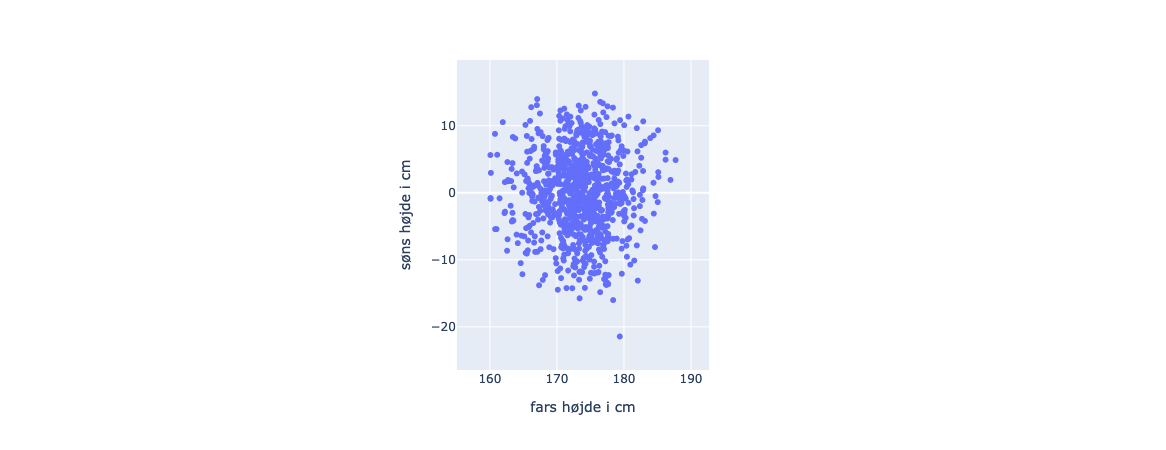

In [52]:
scatterplot(df, x_column='parent', y_column='afstand')

In [63]:
np.sort(np.random.choice(952, 952, replace=True))

array([  2,   5,   6,   6,   6,   7,   7,   7,   9,  10,  10,  11,  12,
        14,  14,  14,  17,  19,  21,  21,  22,  23,  24,  25,  25,  27,
        27,  28,  28,  28,  28,  29,  29,  30,  30,  32,  35,  39,  39,
        42,  43,  44,  45,  47,  47,  47,  49,  49,  51,  54,  54,  55,
        56,  57,  59,  59,  59,  61,  61,  61,  62,  62,  62,  64,  64,
        65,  68,  69,  69,  70,  71,  72,  72,  73,  73,  77,  77,  77,
        77,  79,  79,  80,  80,  80,  83,  83,  84,  87,  88,  88,  89,
        89,  90,  93,  93,  94,  95,  96,  99,  99, 100, 102, 105, 105,
       105, 108, 109, 109, 111, 112, 112, 116, 117, 119, 120, 120, 120,
       122, 122, 123, 125, 127, 128, 129, 132, 133, 134, 134, 138, 140,
       140, 142, 142, 143, 143, 145, 146, 146, 147, 151, 151, 152, 153,
       155, 155, 157, 157, 157, 159, 159, 160, 160, 164, 165, 167, 167,
       167, 170, 171, 171, 172, 172, 176, 176, 177, 178, 179, 181, 181,
       182, 186, 187, 188, 191, 192, 193, 193, 193, 195, 198, 19

In [54]:
# Sklearn linear regression

In [55]:
X = df['parent'].values.reshape(952,1)

In [56]:
y = df['child'].values

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [58]:
print(regressor.intercept_)

67.19712037928015


In [59]:
print(regressor.coef_)

[0.61152221]


In [60]:
preds = regressor.predict(X)

In [61]:
from sklearn import metrics

In [62]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, preds)))

Root Mean Squared Error: 5.98026496448485


In [64]:
8783/3751

2.341508930951746

In [65]:
np.sqrt(2.341508930951746)

1.5301989841036185

In [66]:
np.sqrt(1.5301989841036185)

1.237012119626812

In [67]:
1.23701**4

2.341492882241226